# Homework 4 - MLE & MAP

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import data
import scipy 
from sklearn.model_selection import train_test_split

In [2]:
def generate_dataset(K, a, b, var, N):

    theta_true = np.ones(K)

    X = np.random.uniform(a, b, N)

    #Phi is the vander matrix created from X and K
    Phi = np.vander(X, K, increasing=True)

    #normal distribution of noise
    noise = np.random.normal(0, np.sqrt(var), N)

    #definition of Y
    Y = Phi @ theta_true + noise

    return X, Y, Phi

a, b = -1, 1 
var = 0.02  
N = 1000
X, Y, Phi = generate_dataset(3, a, b, var, N)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


print(Phi)

[[ 1.          0.36981332  0.13676189]
 [ 1.          0.38788084  0.15045155]
 [ 1.         -0.34645263  0.12002942]
 ...
 [ 1.         -0.10486774  0.01099724]
 [ 1.          0.67491235  0.45550668]
 [ 1.         -0.16412931  0.02693843]]


AVG error test K:1 = 0.4971143549277732
AVG error test K:2 = 0.11718107279095501
AVG error test K:4 = 0.01786246612531515
AVG error test K:6 = 0.019362462057120965


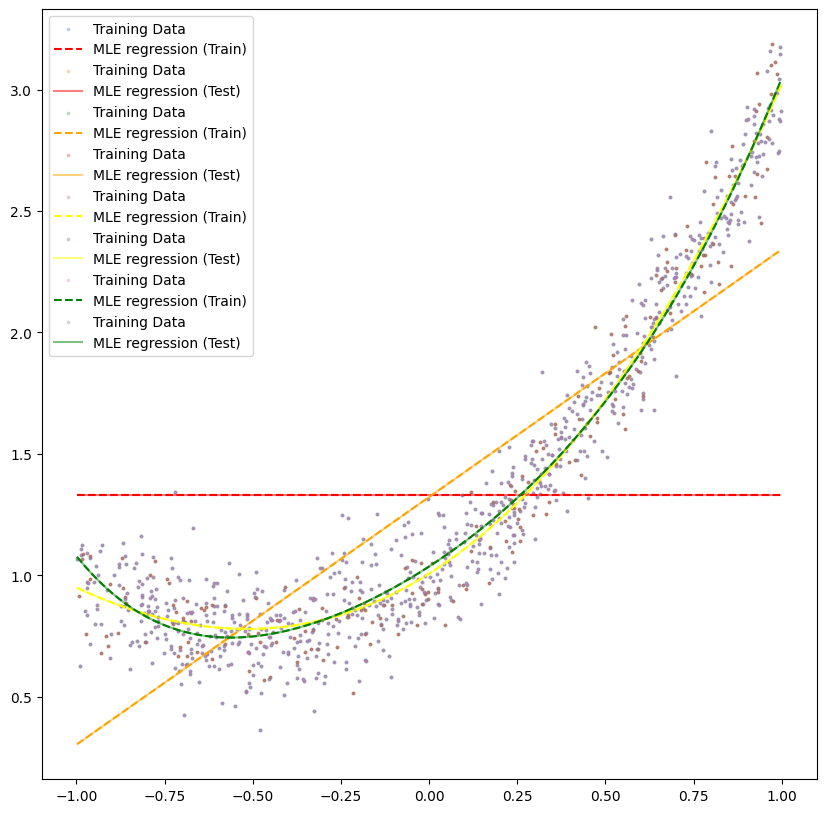

In [3]:
def avg_absolute_error(theta, X, Y, K):
    Phi_X = vandermonde_matrix(X, K)
    predictions = Phi_X @ theta
    return (1 / Y.shape[0]) * np.linalg.norm(predictions - Y, 2)**2
def error_theta(t):
    t_t = np.ones(t.shape)
    return np.linalg.norm(t - t_t, 2) / np.linalg.norm(t_t, 2)

def linear_regression(X, theta):
    return X @ theta

def vandermonde_matrix(X, K):
    return np.vander(X, K, increasing=True)

def loss(theta, Phi_X, Y):
    predictions = Phi_X @ theta
    return 0.5 * np.linalg.norm(predictions - Y,2)**2

def grad_loss(theta, Phi_X, Y):
    predictions = Phi_X @ theta
    return -Phi_X.T @ (Y - predictions)

def mle_solution(X, Y, K, learning_rate=0.0001, num_iterations=1000):
    theta = np.zeros(K)  # Inizializzazione di theta a zero o con valori casuali
    
    Phi_X = vandermonde_matrix(X, K)
    
    for _ in range(num_iterations):
        gradient = grad_loss(theta, Phi_X, Y)
        theta = theta - learning_rate * gradient
    
    return theta


def plot_regression_model(X, Y, theta, K, label, color, line, a):
    plt.scatter(X, Y, label='Training Data', alpha=0.25, s=3)

    X_plot = np.linspace(min(X), max(X), 100)
    Phi_plot = vandermonde_matrix(X_plot, K)
    Y_plot = linear_regression(Phi_plot, theta)

    # Plot the regression model
    plt.plot(X_plot, Y_plot, label=label, color=color, linestyle=line, alpha=a)

theta_mle_train_final = []
theta_mle_test_final = []
i = 0
color_plot = ['red', 'orange','yellow' , 'green']

plt.figure(figsize=(10,10))
error_test_final = []
error_train_final = []

for K in [1,2,4,6]:
    theta_mle_train = mle_solution(X_train, Y_train, K)
    #theta_mle_test = mle_solution(X_test, Y_test, K)
    theta_mle_train_final.append(theta_mle_train)
    #theta_mle_test_final.append(theta_mle_test_final)
    # Plot del modello
    plot_regression_model(X_train, Y_train, theta_mle_train, K, 'MLE regression (Train)', color_plot[i],'dashed', 1.0)
    plot_regression_model(X_test, Y_test, theta_mle_train, K, 'MLE regression (Test)', color_plot[i],'solid', 0.5)
    
    error_test = avg_absolute_error(theta_mle_train, X_test, Y_test, K)
    error_train = avg_absolute_error(theta_mle_train, X_train, Y_train, K)
    error_train_final.append(error_train)
    error_test_final.append(error_test)
    print(f"AVG error test K:{K} = {error_test}")



    i += 1
plt.legend()
plt.show()



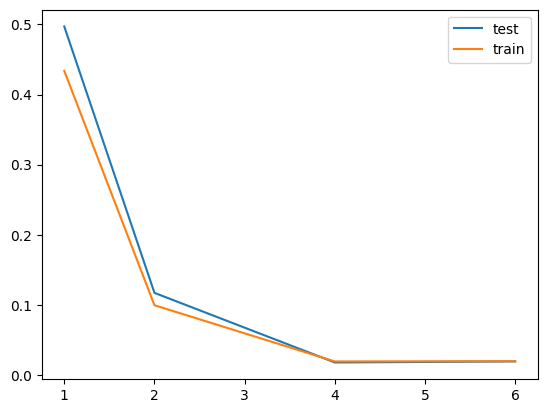

In [4]:
plt.figure()
x = [1,2,4,6]
plt.plot(x,error_test_final,label='test')
plt.plot(x,error_train_final,label='train')
plt.legend()
plt.show()

In [5]:
    
def loss_map(theta, Phi_X, Y, lambda_value):
    predictions = Phi_X @ theta
    regularization_term = 0.5 * lambda_value * np.linalg.norm(theta,2)**2
    return 0.5 * np.linalg.norm(predictions - Y,2)**2 + regularization_term

def grad_loss_map(theta, Phi_X, Y, lambda_value):
    predictions = Phi_X @ theta
    regularization_term = lambda_value * theta
    return -Phi_X.T @ (Y - predictions) + regularization_term

def map_solution(X, Y, K, lambda_value, learning_rate=0.0001, num_iterations=1000):
    theta = np.zeros(K)  
    Phi_X = vandermonde_matrix(X, K)
    
    for _ in range(num_iterations):
        gradient = grad_loss_map(theta, Phi_X, Y, lambda_value)
        theta = theta - learning_rate * gradient
    
    return theta


lambda value: 0.1
AVG error test K:1 = 0.48987072044731106
AVG error test K:2 = 0.11670395458804018
AVG error test K:3 = 0.018252680851176536
AVG error test K:4 = 0.02078716395302307


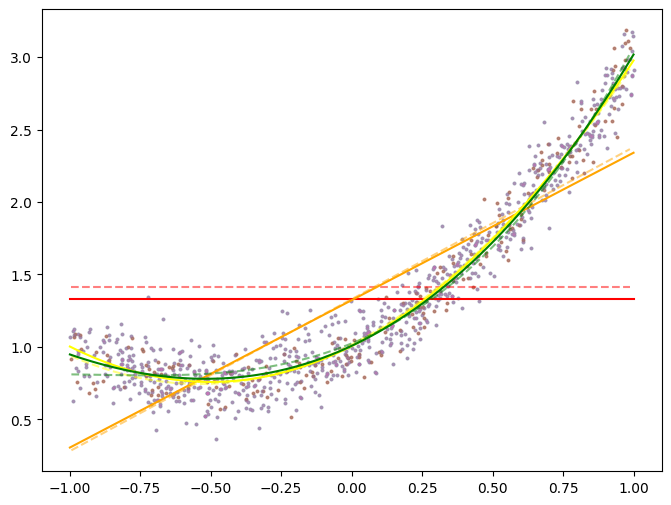

lambda value: 1.0666666666666667
AVG error test K:1 = 0.48992673660733593
AVG error test K:2 = 0.11683357726442115
AVG error test K:3 = 0.018714136067299117
AVG error test K:4 = 0.02127891981726377


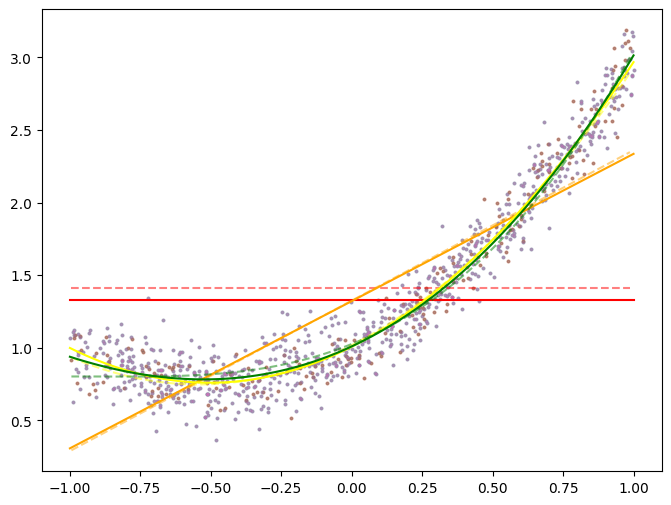

lambda value: 2.033333333333333
AVG error test K:1 = 0.49007363168359674
AVG error test K:2 = 0.11715444006079608
AVG error test K:3 = 0.01937156968574069
AVG error test K:4 = 0.02190671447121314


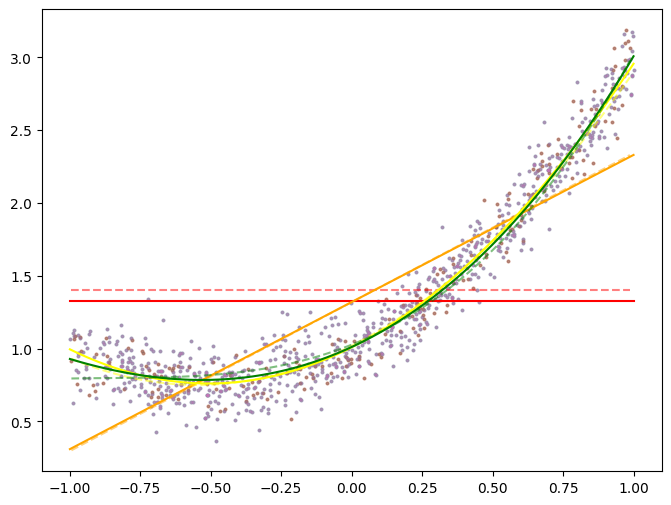

lambda value: 3.0
AVG error test K:1 = 0.4903088076973717
AVG error test K:2 = 0.11765596135252279
AVG error test K:3 = 0.020210029601331208
AVG error test K:4 = 0.022661373568213784


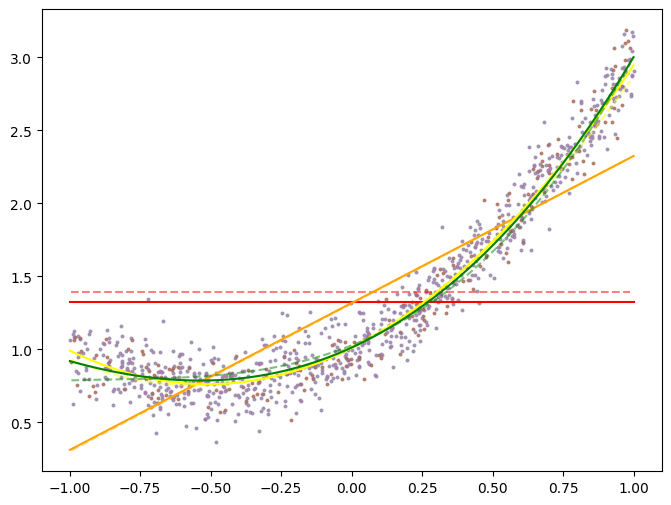

In [6]:

error_train_final_map = []
error_test_final_map = []



for lambda_value in np.linspace(0.1, 3, 4):
    plt.figure(figsize=(8,6))
    i = 0
    color_plot = ['red', 'orange','yellow' , 'green']
    print(f"lambda value: {lambda_value}")
    for K in [1,2,3,4]:
        theta_map_train = map_solution(X_train, Y_train, K, lambda_value)
        theta_map_test = map_solution(X_test, Y_test, K, lambda_value)
        

        plot_regression_model(X_train, Y_train, theta_map_train, K, 'MAP regression (Train)', color_plot[i],'solid', 1.0)
        plot_regression_model(X_test, Y_test, theta_map_test, K, 'MAP regression (Test)', color_plot[i],'dashed', 0.5)
        
        error_test = avg_absolute_error(theta_map_test, X_test, Y_test, K)
        error_train = avg_absolute_error(theta_map_train, X_train, Y_train, K)
        error_train_final_map.append(error_train)
        error_test_final_map.append(error_test)
        i += 1

        print(f"AVG error test K:{K} = {error_test}")
    plt.show()
    


AVG error test K:4 = 0.026382103535117933
N: 1000     Lamda: 0.1
AVG error test K:4 = 0.026609444657585316
N: 1000     Lamda: 1.3250000000000002
AVG error test K:4 = 0.026870105548448132
N: 1000     Lamda: 2.5500000000000003
AVG error test K:4 = 0.02716041668039421
N: 1000     Lamda: 3.7750000000000004
AVG error test K:4 = 0.02747723799014896
N: 1000     Lamda: 5.0


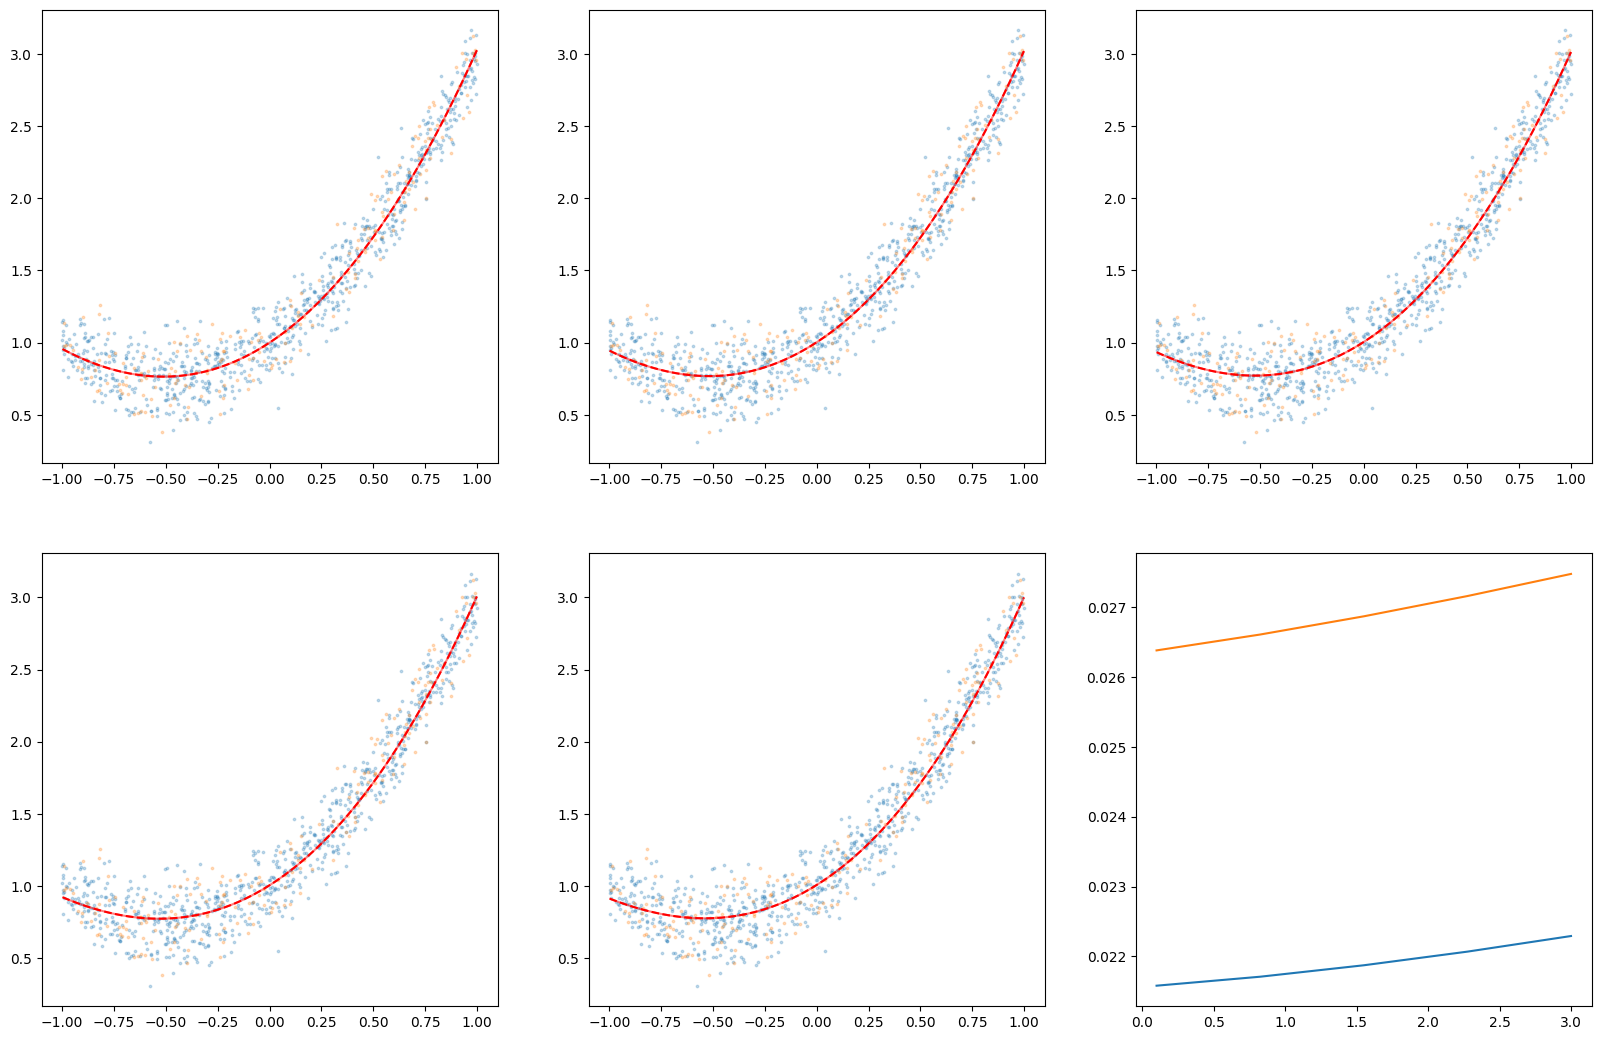

In [7]:
plt.figure(figsize=(20,20))
p = 1
N = 1000
a, b = -1, 1 
var = 0.02  
X, Y, Phi = generate_dataset(3, a, b, var, N)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

theta_map_train_final = []
theta_map_test_final = []
K = 4

for lambda_value in np.linspace(0.1, 5, 5):
    i = 0
    color_plot = ['red', 'orange', 'yellow','green', 'blue']
    
    plt.subplot(3,3,p)
    p += 1

    theta_map_train = map_solution(X_train, Y_train, K, lambda_value)
    
    plot_regression_model(X_train, Y_train, theta_map_train, K, 'MAP regression (Train)', color_plot[i],'dashed', 1.0)
    plot_regression_model(X_test, Y_test, theta_map_train, K, 'MAP regression (Test)', color_plot[i],'solid', 0.5)
    
    error_test = avg_absolute_error(theta_map_train, X_test, Y_test, K)
    error_train = avg_absolute_error(theta_map_train, X_train, Y_train, K)
    theta_map_train_final.append(error_train)
    theta_map_test_final.append(error_test)

    i += 1
    print(f"AVG error test K:{K} = {error_test}")
    print(f"N: {N}     Lamda: {lambda_value}")

plt.subplot(3,3,p)
plt.plot(np.linspace(0.1, 3, 5),theta_map_train_final)
plt.plot(np.linspace(0.1, 3, 5),theta_map_test_final)


AVG error test K:4 = 0.026382103535117933
AVG error test K:60 = 0.02689422359607543
AVG error test K:4 = 0.026434477315225205
AVG error test K:60 = 0.026962640838218
AVG error test K:4 = 0.026489036808403404
AVG error test K:60 = 0.027033163800975025
AVG error test K:4 = 0.026545717798006564
AVG error test K:60 = 0.027105724339304863


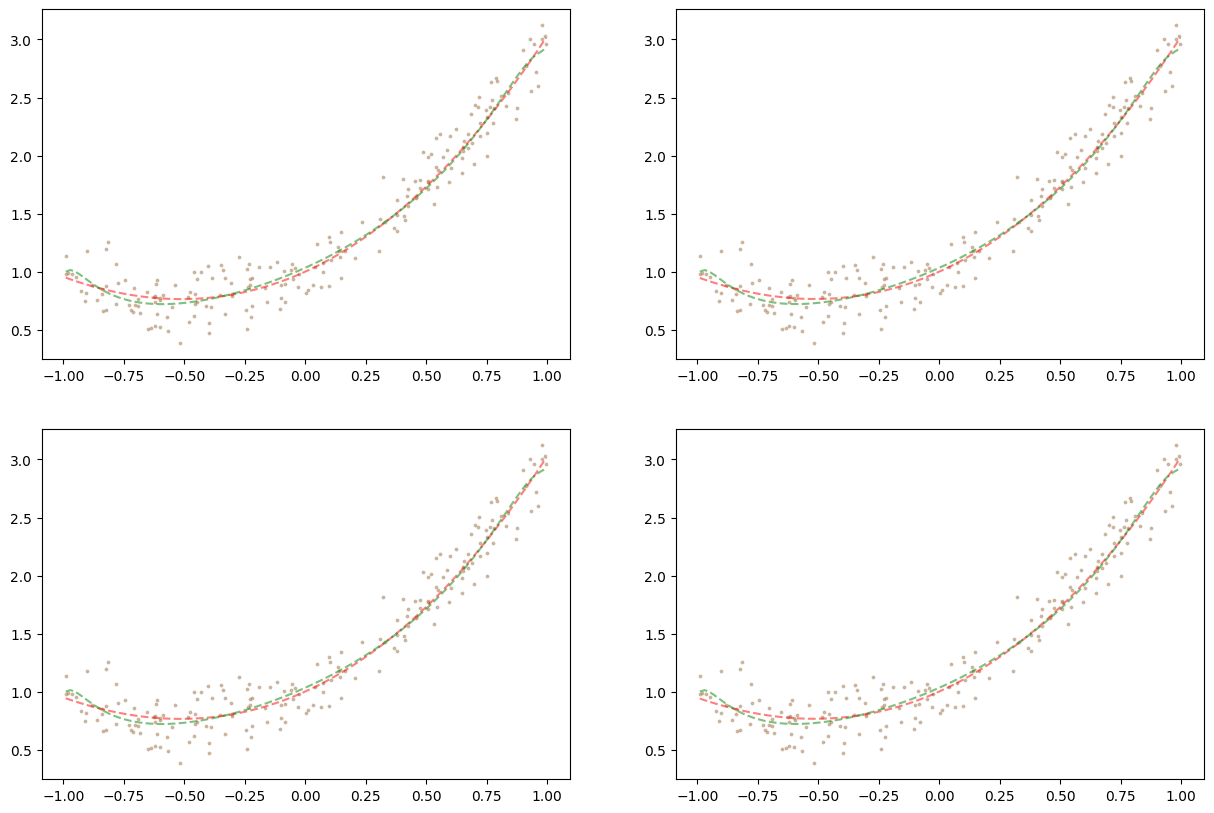

In [8]:
error_train_final_map = []
error_test_final_map = []
plt.figure(figsize=(15,10))
j = 1
for lambda_value in np.linspace(0.1, 1, 4):
    plt.subplot(2,2,j)
    j += 1
    i = 0
    color_plot = ['red', 'green']
    for K in [4, 60]:
        theta_map_train = map_solution(X_train, Y_train, K, lambda_value)
        #theta_map_test = map_solution(X_test, Y_test, K, lambda_value)
        theta_map_train_final.append(theta_map_train)
        #theta_map_test_final.append(theta_map_test_final)

        plot_regression_model(X_test, Y_test, theta_map_train, K, 'MAP regression (Test)', color_plot[i],'dashed', 0.5)
        
        error_test = avg_absolute_error(theta_map_train, X_test, Y_test, K)
        error_train = avg_absolute_error(theta_map_train, X_train, Y_train, K)
        error_train_final_map.append(error_train)
        error_test_final_map.append(error_test)
        i += 1

        print(f"AVG error test K:{K} = {error_test}")
plt.show()


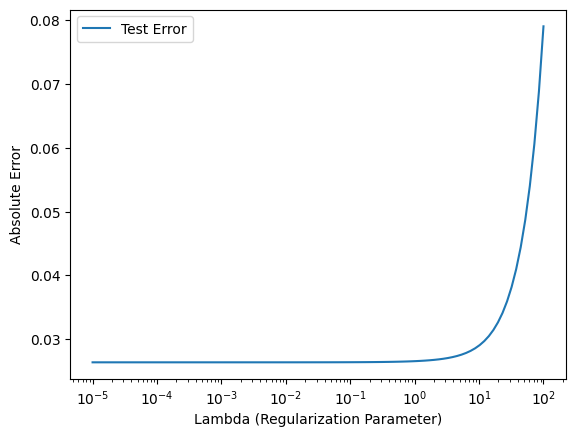

In [9]:

def compute_error_for_different_lambda(X_train, Y_train, X_test, Y_test, K, max_lambda):
    
    test_errors = []

    for lambda_value in np.logspace(-5, 2, max_lambda):
        # MAP polynomial regression with regularization
        theta_map = map_solution(X_train, Y_train, K, lambda_value)

        # Compute test error
        test_error = avg_absolute_error(theta_map, X_test, Y_test, K)
        test_errors.append(test_error)

    return test_errors

def plot_errors_with_respect_to_lambda(test_errors, max_lambda):
   
    lambda_values = np.logspace(-5, 2, max_lambda)

    plt.plot(lambda_values, test_errors, label='Test Error')
    plt.xscale('log')
    plt.xlabel('Lambda (Regularization Parameter)')
    plt.ylabel('Absolute Error')
    plt.legend()
    plt.show()

#testing the functions
K = 4
max_lambda = 100
test_err_map = compute_error_for_different_lambda(X_train, Y_train, X_test, Y_test, K, max_lambda)
plot_errors_with_respect_to_lambda(test_err_map, max_lambda)

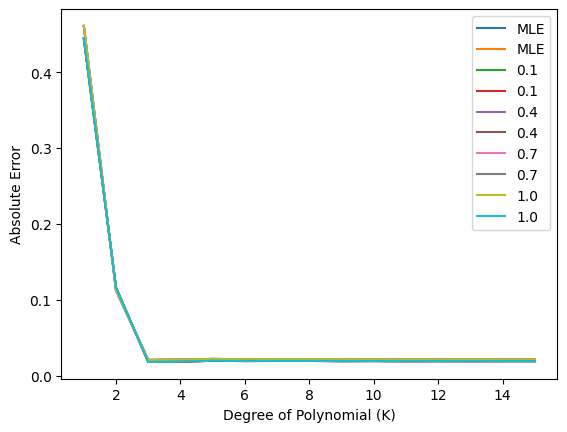

In [10]:
def compute_errors_for_different_K(X_train, Y_train, X_test, Y_test, max_K):
    
    training_errors = []
    test_errors = []

    for K in range(1, max_K + 1):
        # MLE polynomial regression
        theta_mle = mle_solution(X_train, Y_train, K)

        # Compute training error
        training_error = avg_absolute_error(theta_mle, X_train, Y_train, K)
        training_errors.append(training_error)

        # Compute test error
        test_error = avg_absolute_error(theta_mle, X_test, Y_test, K)
        test_errors.append(test_error)

    return training_errors, test_errors

def compute_errors_for_different_K_MAP(X_train, Y_train, X_test, Y_test, max_K, lamb):
    
    training_errors = []
    test_errors = []

    for K in range(1, max_K + 1):
        # MLE polynomial regression
        theta_mle = map_solution(X_train, Y_train, K, lamb)

        # Compute training error
        training_error = avg_absolute_error(theta_mle, X_train, Y_train, K)
        training_errors.append(training_error)

        # Compute test error
        test_error = avg_absolute_error(theta_mle, X_test, Y_test, K)
        test_errors.append(test_error)

    return training_errors, test_errors

def plot_errors_with_respect_to_K(training_errors, test_errors, l):
    
    K_values = range(1, len(training_errors) + 1)

    plt.plot(K_values, training_errors, label=l)
    plt.plot(K_values, test_errors, label=l)
    plt.xlabel('Degree of Polynomial (K)')
    plt.ylabel('Absolute Error')
    plt.legend()


a, b = -1, 1 
var = 0.02  
N = 1000
X, Y, Phi = generate_dataset(3, a, b, var, N)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
max_K = 15
plt.figure()
tr_err, test_err = compute_errors_for_different_K(X_train, Y_train, X_test, Y_test, max_K)
plot_errors_with_respect_to_K(tr_err, test_err, 'MLE')
for lambda_value in np.linspace(0.1, 1, 4):
    tr_err, test_err = compute_errors_for_different_K_MAP(X_train, Y_train, X_test, Y_test, max_K, lambda_value)
    plot_errors_with_respect_to_K(tr_err, test_err, lambda_value)
plt.show()






AVG error test K:1 = 0.6630673488813756
AVG error test K:2 = 0.16929615355025796
AVG error test K:4 = 0.039181194566580674
AVG error test K:6 = 0.05607484734054056


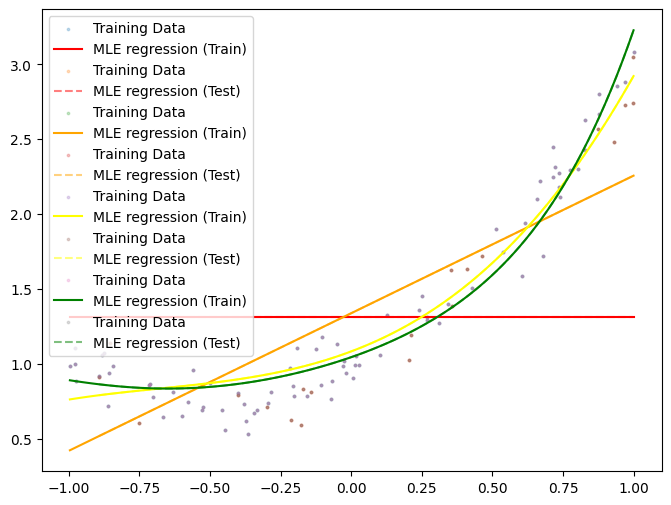

AVG error test K:1 = 0.39353702048836403
AVG error test K:2 = 0.09967132504647339
AVG error test K:4 = 0.022089725937886197
AVG error test K:6 = 0.021996312604555368


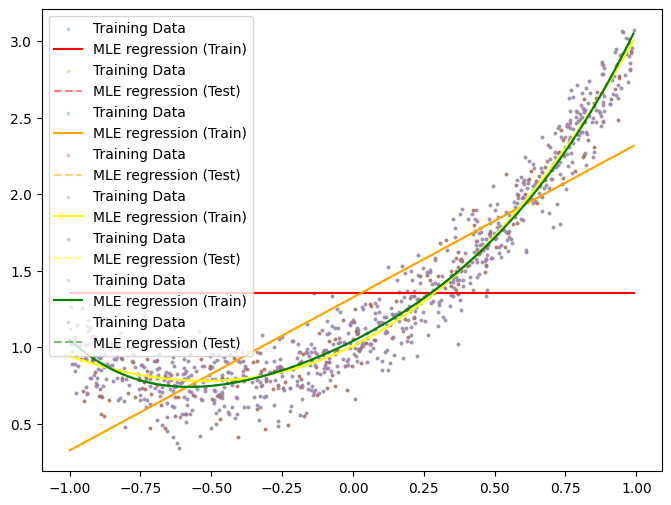

AVG error test K:1 = 0.44872825711327435
AVG error test K:2 = 0.11346116018965566
AVG error test K:4 = 0.020661386560471215
AVG error test K:6 = 0.02071884249650607


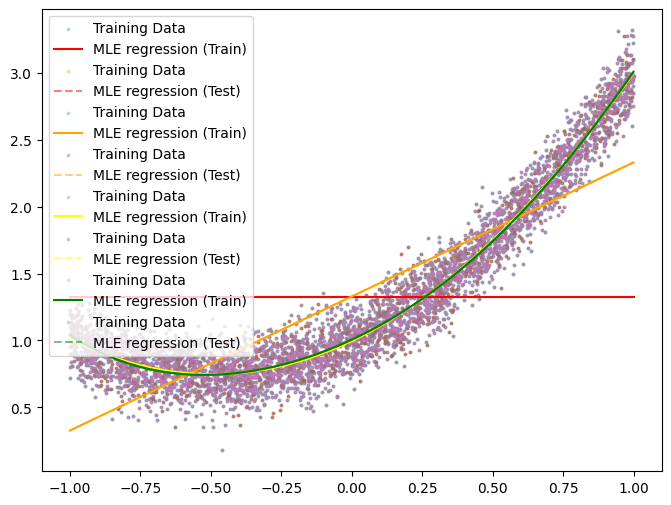

AVG error test K:1 = 0.4220772408127301
AVG error test K:2 = 0.10931130822901274
AVG error test K:4 = 0.02028134156286973
AVG error test K:6 = 0.020284788588826656


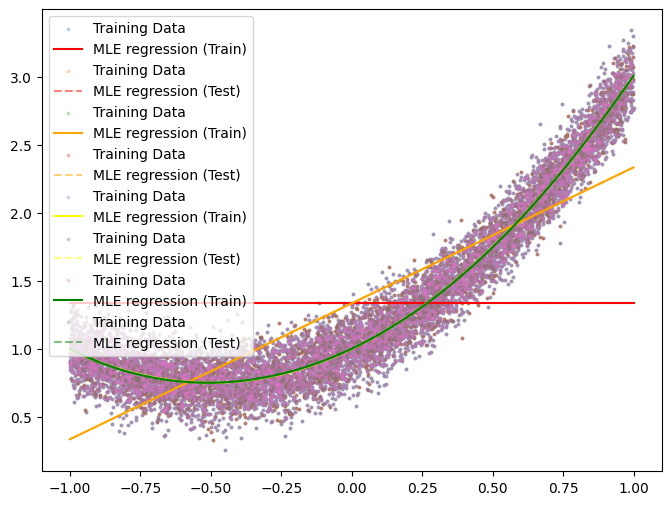

In [11]:
error_test_final = []
error_train_final = []
for N in [100,1000,5000,10000]:
    a, b = -1, 1 
    var = 0.02  
    X, Y, Phi = generate_dataset(3, a, b, var, N)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    theta_mle_train_final = []
    theta_mle_test_final = []
    i = 0
    color_plot = ['red', 'orange','yellow' , 'green']

    plt.figure(figsize=(8,6))
   

    for K in [1,2,4,6]:
        theta_mle_train = mle_solution(X_train, Y_train, K)
        #theta_mle_test = mle_solution(X_test, Y_test, K)
        theta_mle_train_final.append(theta_mle_train)
        #theta_mle_test_final.append(theta_mle_test_final)
        # Plot del modello
        plot_regression_model(X_train, Y_train, theta_mle_train, K, 'MLE regression (Train)', color_plot[i],'solid', 1.0)
        plot_regression_model(X_test, Y_test, theta_mle_train, K, 'MLE regression (Test)', color_plot[i],'dashed', 0.5)
        
        error_test = avg_absolute_error(theta_mle_train, X_test, Y_test, K)
        error_train = avg_absolute_error(theta_mle_train, X_train, Y_train, K)
        error_train_final.append(error_train)
        error_test_final.append(error_test)
        print(f"AVG error test K:{K} = {error_test}")



        i += 1
    plt.legend()
    plt.show()

In [12]:
j = 0
n = 0
N = [100,1000,5000,10000]
P = [1,2,4,6]
for i in  error_test_final:

    print(f"\nError for N: {N[n]}, K:{P[j]} = {i}")
    j += 1

    if j == 4:
        n += 1
        j=0
        print('______________________________________________')



Error for N: 100, K:1 = 0.6630673488813756

Error for N: 100, K:2 = 0.16929615355025796

Error for N: 100, K:4 = 0.039181194566580674

Error for N: 100, K:6 = 0.05607484734054056
______________________________________________

Error for N: 1000, K:1 = 0.39353702048836403

Error for N: 1000, K:2 = 0.09967132504647339

Error for N: 1000, K:4 = 0.022089725937886197

Error for N: 1000, K:6 = 0.021996312604555368
______________________________________________

Error for N: 5000, K:1 = 0.44872825711327435

Error for N: 5000, K:2 = 0.11346116018965566

Error for N: 5000, K:4 = 0.020661386560471215

Error for N: 5000, K:6 = 0.02071884249650607
______________________________________________

Error for N: 10000, K:1 = 0.4220772408127301

Error for N: 10000, K:2 = 0.10931130822901274

Error for N: 10000, K:4 = 0.02028134156286973

Error for N: 10000, K:6 = 0.020284788588826656
______________________________________________


In [13]:



plt.show()

In [14]:

def sgd(X, Y, K, batch_size, learning_rate=0.0001, num_iterations=1000):
    theta = np.zeros(K)  # Inizializzazione di theta a zero o con valori casuali
    
    for _ in range(num_iterations):
        # Seleziona un mini-batch casuale
        indices = np.random.choice(len(X), size=batch_size, replace=False)
        X_batch = X[indices]
        Y_batch = Y[indices]
        
        Phi_X = vandermonde_matrix(X_batch, K)
        
        gradient = grad_loss(theta, Phi_X, Y_batch)
        theta = theta - learning_rate * gradient
    
    return theta

def gd(X, Y, K, learning_rate=0.0001, num_iterations=1000):
    theta = np.zeros(K)  # Inizializzazione di theta a zero o con valori casuali
    
    Phi_X = vandermonde_matrix(X, K)
    
    for _ in range(num_iterations):
        gradient = grad_loss(theta, Phi_X, Y)
        theta = theta - learning_rate * gradient
    
    return theta



def neq_mle(X, Y, K):
    Phi_X = vandermonde_matrix(X, K)
    theta = scipy.linalg.cho_solve( scipy.linalg.cho_factor(Phi_X.T @ Phi_X), (Phi_X.T @ Y) )
    return theta

def neq_map(X, Y, K, lamb):
        Phi_X = vandermonde_matrix(X, K)
        theta = scipy.linalg.cho_solve( scipy.linalg.cho_factor((Phi_X.T @ Phi_X) + (lamb*np.identity(Phi_X.shape[1]))), (Phi_X.T @ Y) )
        return theta

AVG error test   K:2     M:10        = 0.49737137381728885
AVG error test   K:2     M:50        = 0.10615604772431558
AVG error test   K:2     M:100        = 0.09422967528949937
AVG error test   K:2     M:200        = 0.09355469015642806
AVG error test   K:3     M:10        = 0.39325356993961386
AVG error test   K:3     M:50        = 0.03485430358148783
AVG error test   K:3     M:100        = 0.020176607641018026
AVG error test   K:3     M:200        = 0.017380859158449703
AVG error test   K:4     M:10        = 0.3606620317991447
AVG error test   K:4     M:50        = 0.03267547978030115
AVG error test   K:4     M:100        = 0.024038522493051172
AVG error test   K:4     M:200        = 0.020608040947604524
AVG error test   K:5     M:10        = 0.3225432121422305
AVG error test   K:5     M:50        = 0.025694647013958374
AVG error test   K:5     M:100        = 0.02216899230560116
AVG error test   K:5     M:200        = 0.021177746197113812


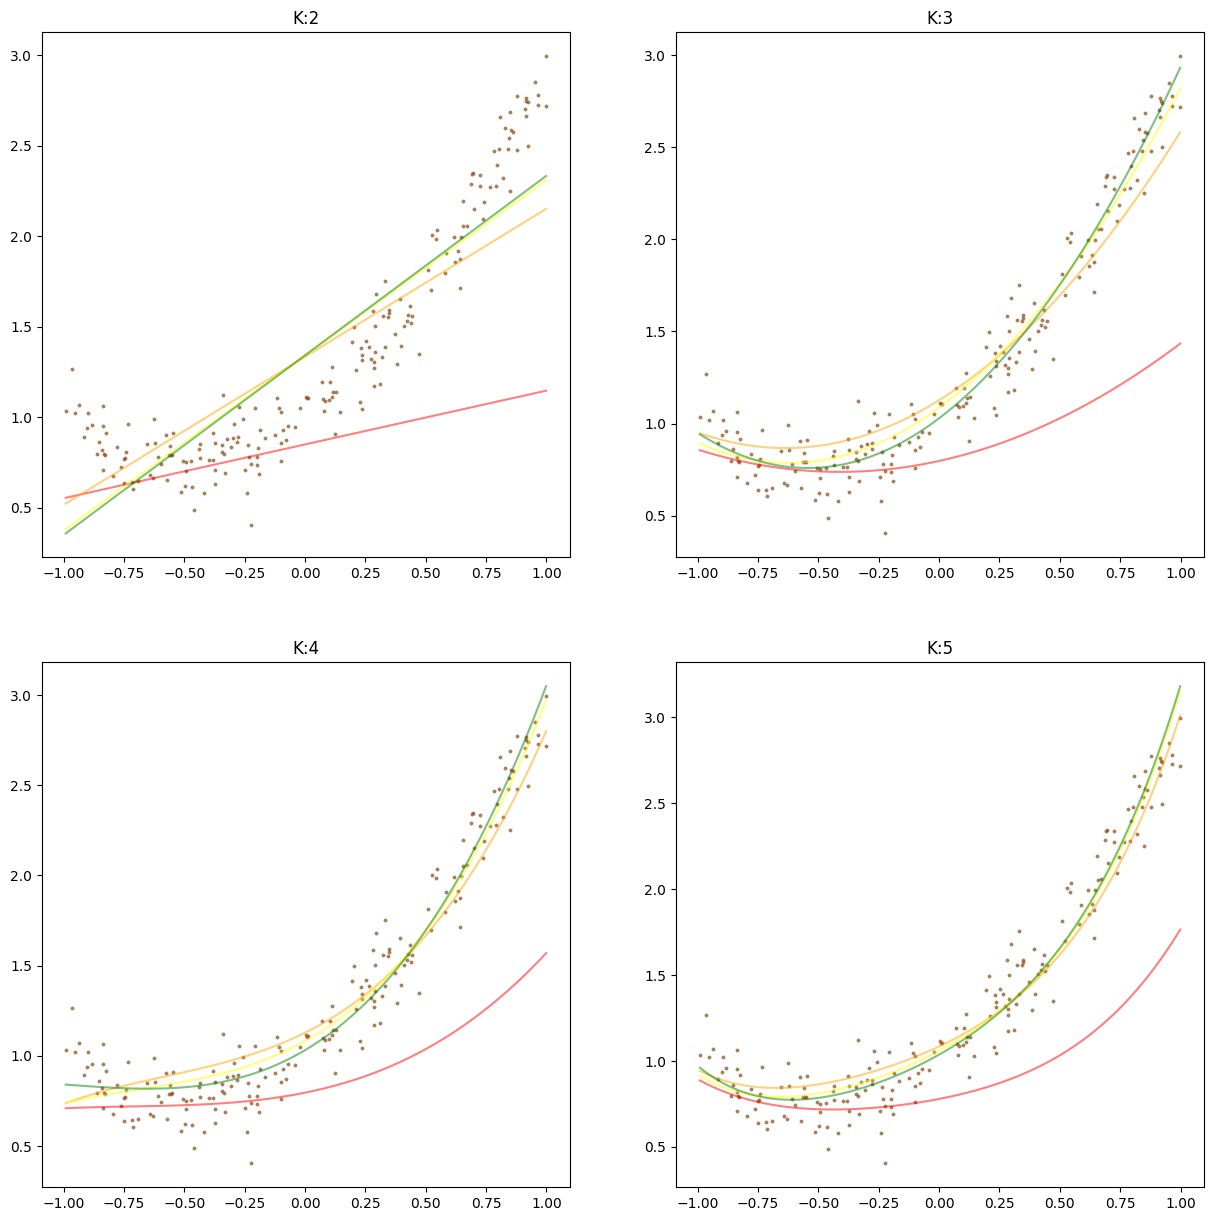

In [15]:

X, Y, Phi = generate_dataset(3, a, b, var, 1000)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
e_t = np.zeros((4,4))
plt.figure(figsize=(15,15))
for K in [2,3,4,5]: 
    color_plot = ['red', 'orange','yellow', 'green']
    plt.subplot(2,2,K-1)
    for i,M in enumerate([10,50,100,200]):
        theta_mle_train = sgd(X_train, Y_train, K, M)
        theta_mle_train_final.append(theta_mle_train)

        # Plot del modello
        plot_regression_model(X_test, Y_test, theta_mle_train, K, 'MLE regression (Test)', color_plot[i],'solid', 0.5)
        error_test = avg_absolute_error(theta_mle_train, X_test, Y_test, K)
        error_train = avg_absolute_error(theta_mle_train, X_train, Y_train, K)
        e_t[i,K-2] = (error_theta(theta_mle_train))
        print(f"AVG error test   K:{K}     M:{M}        = {error_test}")
    plt.title(f"K:{K}")

plt.show()

In [16]:
def loss_map(theta, Phi_X, Y, lambda_value):
    predictions = Phi_X @ theta
    regularization_term = 0.5 * lambda_value * np.linalg.norm(theta,2)**2
    return 0.5 * np.linalg.norm(predictions - Y, 2)**2 + regularization_term

def grad_loss_map(theta, Phi_X, Y, lambda_value):
    predictions = Phi_X @ theta
    regularization_term = lambda_value * theta
    return -Phi_X.T @ (Y - predictions) + regularization_term

def gd_map(X, Y, K, lambda_value, learning_rate=0.0001, num_iterations=1000):
    theta = np.zeros(K)  
    Phi_X = vandermonde_matrix(X, K)
    
    for _ in range(num_iterations):
        gradient = grad_loss_map(theta, Phi_X, Y, lambda_value)
        theta = theta - learning_rate * gradient
    
    return theta
def sgd_map(X, Y, K, lambda_value, batch_size, learning_rate=0.0001, num_iterations=1000,):
    theta = np.zeros(K)
    
    for _ in range(num_iterations):
        # Seleziona un mini-batch casuale
        indices = np.random.choice(len(X), size=batch_size, replace=False)
        X_batch = X[indices]
        Y_batch = Y[indices]
        
        Phi_X = vandermonde_matrix(X_batch, K)
        
        gradient = grad_loss_map(theta, Phi_X, Y_batch, lambda_value)
        theta = theta - learning_rate * gradient
    
    return theta

In [17]:
X, Y, Phi = generate_dataset(3, a, b, var, 1000)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

e_t_mle_gd_f = []
e_t_mle_sgd_f = []
e_t_map_gd_f = []
e_t_map_sgd_f = []
e_t_n_mle_f = []
e_t_n_map_f = []

e_avg_mle_gd_f = []
e_avg_mle_sgd_f = []
e_avg_map_gd_f = []
e_avg_map_sgd_f = []
e_avg_n_mle_f = []
e_avg_n_map_f = []

for K in [2,3,4,5,6]:

        theta_mle_train = mle_solution(X_train, Y_train, K)
        error_avg_mle_gd = avg_absolute_error(theta_mle_train, X_test, Y_test, K)
        e_avg_mle_gd_f.append(error_avg_mle_gd)
        e_t_mle_gd = error_theta(theta_mle_train)
        e_t_mle_gd_f.append(e_t_mle_gd)

##############################################################################

        theta_mle_train = sgd(X_train, Y_train, K, 300)
        error_avg_mle_sgd = avg_absolute_error(theta_mle_train, X_test, Y_test, K)
        e_avg_mle_sgd_f.append(error_avg_mle_sgd)
        e_t_mle_sgd = error_theta(theta_mle_train)
        e_t_mle_sgd_f.append(e_t_mle_sgd)

##############################################################################

        theta_map_train = gd_map(X_train, Y_train, K, 0.7)
        error_avg_map_gd = avg_absolute_error(theta_map_train, X_test, Y_test, K)
        e_avg_map_gd_f.append(error_avg_map_gd)
        e_t_map_gd = error_theta(theta_map_train)
        e_t_map_gd_f.append(e_t_map_gd)

##############################################################################

        theta_map_train = sgd_map(X_train, Y_train, K, 0.7, 300)
        error_avg_map_sgd = avg_absolute_error(theta_map_train, X_test, Y_test, K)
        e_avg_map_sgd_f.append(error_avg_map_sgd)
        e_t_map_sgd = error_theta(theta_map_train)
        e_t_map_sgd_f.append(e_t_map_sgd)

##############################################################################

        theta_neq_mle = neq_mle(X_train, Y_train, K)
        error_avg_neq_mle = avg_absolute_error(theta_neq_mle, X_test, Y_test, K)
        e_avg_n_mle_f.append(error_avg_neq_mle)
        e_t_n_mle = error_theta(theta_neq_mle)
        e_t_n_mle_f.append(e_t_n_mle)

##############################################################################

        theta_neq_map = neq_map(X_train, Y_train, K, 0.7)
        error_avg_neq_map = avg_absolute_error(theta_neq_map, X_test, Y_test, K)
        e_avg_n_map_f.append(error_avg_neq_map)
        e_t_n_map = error_theta(theta_neq_map)
        e_t_n_map_f.append(e_t_n_map)


        if K == 4:
                print(f"K: {K}")
                print("| Technique | Error (Avg) | Theta Error |")
                print("|------------|--------------|----------------------|")
                print(f"| MLE GD     | {error_avg_mle_gd:.4f}       | {e_t_mle_gd}  ")
                print(f"| MLE SGD    | {error_avg_mle_sgd:.4f}       | {e_t_mle_sgd}  ")
                print(f"| MAP GD     | {error_avg_map_gd:.4f}       | {e_t_map_gd}  ")
                print(f"| MAP SGD    | {error_avg_map_sgd:.4f}       | {e_t_map_sgd}")
                print(f"| MLE NEQ    | {error_avg_neq_mle:.4f}       | {e_t_n_mle}")
                print(f"| MAP NEQ    | {error_avg_neq_map:.4f}       | {e_t_n_map}")
                print()

   


K: 4
| Technique | Error (Avg) | Theta Error |
|------------|--------------|----------------------|
| MLE GD     | 0.0213       | 0.4384847634683751  
| MLE SGD    | 0.0226       | 0.3725112873074681  
| MAP GD     | 0.0214       | 0.43486819212773065  
| MAP SGD    | 0.0232       | 0.37104591641815327
| MLE NEQ    | 0.0213       | 0.492465037081361
| MAP NEQ    | 0.0213       | 0.48234754127428964



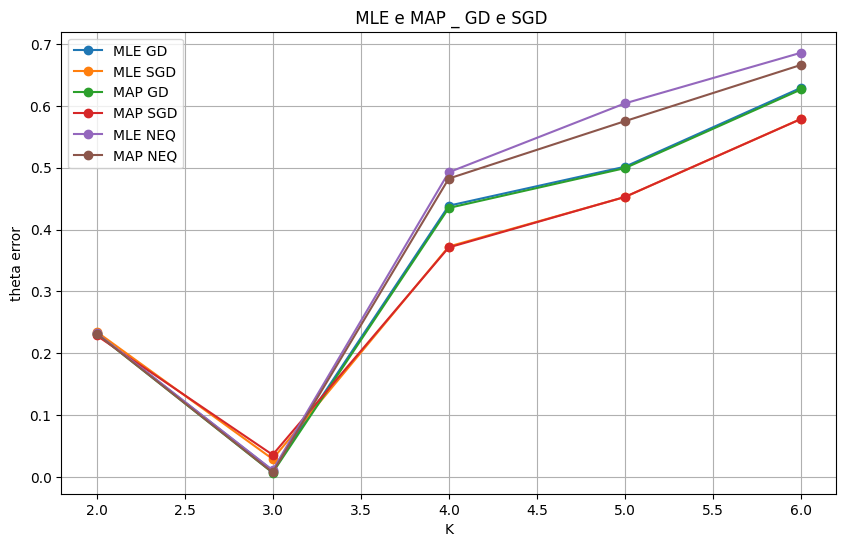

In [18]:
plt.figure(figsize=(10, 6))

x_p = [2, 3, 4, 5, 6]

plt.plot(x_p, e_t_mle_gd_f, label='MLE GD', marker='o')
plt.plot(x_p, e_t_mle_sgd_f, label='MLE SGD', marker='o')
plt.plot(x_p, e_t_map_gd_f, label='MAP GD', marker='o')
plt.plot(x_p, e_t_map_sgd_f, label='MAP SGD', marker='o')
plt.plot(x_p, e_t_n_mle_f, label='MLE NEQ', marker='o')
plt.plot(x_p, e_t_n_map_f, label='MAP NEQ', marker='o')


plt.xlabel('K')
plt.ylabel('theta error')
plt.title(' MLE e MAP _ GD e SGD')
plt.legend()
plt.grid(True)

plt.show()


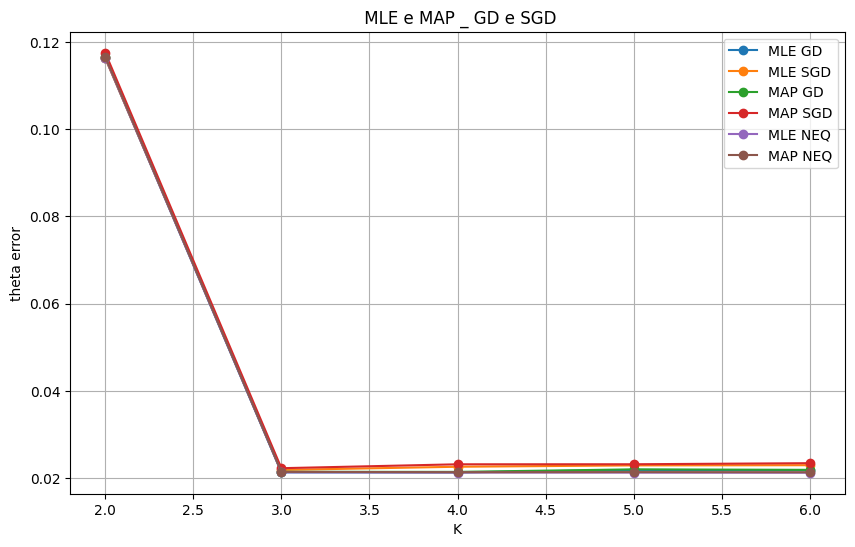

In [19]:
plt.figure(figsize=(10, 6))

x_p = [2, 3, 4, 5, 6]

plt.plot(x_p, e_avg_mle_gd_f, label='MLE GD', marker='o')
plt.plot(x_p, e_avg_mle_sgd_f, label='MLE SGD', marker='o')
plt.plot(x_p, e_avg_map_gd_f, label='MAP GD', marker='o')
plt.plot(x_p, e_avg_map_sgd_f, label='MAP SGD', marker='o')
plt.plot(x_p, e_avg_n_mle_f, label='MLE NEQ', marker='o')
plt.plot(x_p, e_avg_n_map_f, label='MAP NEQ', marker='o')


plt.xlabel('K')
plt.ylabel('theta error')
plt.title(' MLE e MAP _ GD e SGD')
plt.legend()
plt.grid(True)

plt.show()